# Deciphering Lost Languages - A Window into Human History
**Did you know that Cleopatra lived closer to the release of the iPhone than to the building of the pyramids?** This striking fact illustrates the enormous time difference between our world and the ancient past—where the words, lives, and ideas of past civilizations remain hidden in forgotten languages. Though these texts once teemed with life, they have, for centuries, remained beyond reach, locked in unfamiliar symbols and undeciphered scripts.

# Model Objective and Overview

With this model, **the aim is to bridge these millennia, using Gemini’s powerful 2-million-token context window to delve into the lives, cultures, and wisdom of ancient societies.** The model’s unique long-context processing enables detailed, contextually rich translations, providing a groundbreaking tool for historians, linguists, and anyone interested in decoding ancient languages and understanding the insights they contain.

# Setup & Installation
In this section, we imported and installed all the required libraries. Namely **Google Cloud Platforms - Vertex AI** as well as hidden user credentials - **UserSecretsClient.**

In [14]:
!pip install -q --upgrade google-cloud-aiplatform

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemini-long-context/submission_instructions.txt


In [16]:
#Accessing google cloud credentials 
import vertexai
import datetime
import time

from vertexai.preview import caching
from kaggle_secrets import UserSecretsClient
from vertexai.generative_models import GenerativeModel, Part, SafetySetting, Image

user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)

# What languages should we show Gemini?
The documents passed to train Gemini were based on the following tree of the development of ancient languages
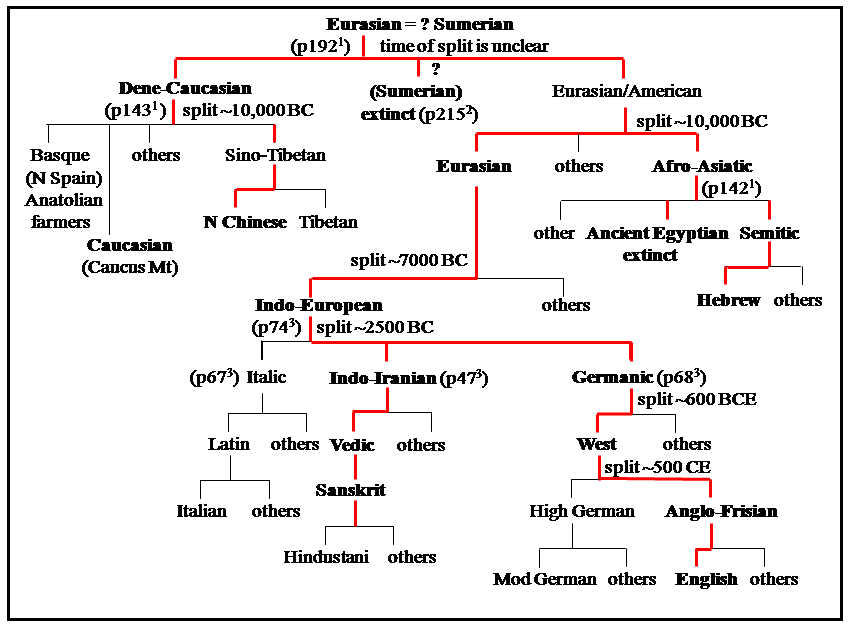

As we dive into the origins of the ancient Egyptian language, we find that it emerged from the **Afro-Asiatic language** family, which itself has deep historical ties to **Sumerian—one** of the earliest known languages. Recognizing these linguistic roots, I incorporated both Sumerian and Afro-Asiatic dictionaries into the model to provide a foundational understanding of related linguistic structures and vocabulary.

In addition, I enriched the model's dataset with various descendant and closely related languages, including **Coptic, Meroitic, Egyptian Arabic, and Cushitic.** Each of these languages evolved from or was influenced by Egyptian linguistic traditions, carrying forward unique elements of the ancient language and culture.

Thanks to the model's expansive context window, it can analyze, compare, and synthesize patterns across these related languages. This large window allows the model to **retain essential information across vast linguistic datasets**, giving it a nuanced grasp of the similarities and differences that mark ancient Egyptian and its relatives. With this cross-linguistic knowledge, the model makes informed, contextually accurate deductions, producing translations that echo the true voice and intent of the original text based on any prompt we give it.

In [17]:
system_instruction = """
You are an expert in linguistics and script analysis, specializing in interpreting the structure and meaning of unknown or undeciphered languages.
You have broad knowledge across linguistic families and ancient scripts, enabling you to identify universal patterns and make insightful cross-linguistic comparisons.

Your task is to decipher an unknown language by systematically breaking down symbols, identifying patterns, and applying principles from comparative linguistics. Utilize the sources and reference materials provided to inform your analysis and to make educated, evidence-based hypotheses.
Approach this task with the following structured steps:

1. Frequency and Distribution Analysis:
   - Identify each unique symbol or character and calculate its frequency within the text.
   - Focus on symbols that appear frequently, as these may represent common linguistic elements (such as articles, conjunctions, or frequent verbs).
   - Refer to relevant sources to compare statistical distributions or identify potential parallels in frequency patterns.

2. Symbol Order and Placement:
   - Examine the sequence and arrangement of symbols in words and phrases.
   - Look for recurring patterns, such as symbols consistently appearing at the start or end of words, which might indicate grammatical markers (prefixes, suffixes, pronouns).
   - Use provided sources to validate symbol placements and identify any known syntactic structures.

3. Character Set and Variants:
   - Document the full set of characters, noting any variations or symbols with similar structures.
   - Record any diacritical marks or accents that might indicate phonetic differences, emphasis, or grammatical functions.
   - Cross-reference with source materials to identify character similarities with known scripts or to gather insights on possible phonetic functions.

4. Contextual Association:
   - Consider any associated objects, artifacts, or settings in which the text is found, and note if certain symbols or patterns appear consistently in particular contexts, which may suggest specific uses (e.g., ceremonial, legal).
   - Hypothesize about the language’s function based on its placement and context (e.g., religious, administrative), consulting references for contextually similar inscriptions or known ceremonial language patterns.

5. Comparative Analysis with Known Languages:
   - Compare symbols and patterns with features of known languages or scripts that may share geographic, cultural, or linguistic similarities.
   - Draw on neighboring languages or scripts to form hypotheses on symbol meanings, phonetic values, and grammatical structures.
   - Leverage the sources provided to support cross-linguistic comparisons and strengthen interpretative accuracy.

6. Repetition and Formulaic Language:
   - Identify repetitive sequences that could signify names, titles, or fixed expressions commonly used in formal or ritual contexts.
   - Note patterns that suggest formulaic language and compare with similar examples in other languages if available.
   - Reference provided materials for examples of formulaic language to draw informed parallels.

7. Hypothesis Testing and Iterative Refinement:
   - Develop hypotheses about symbol meanings, phonetic values, or grammatical functions based on observed patterns.
   - Continuously test and refine these hypotheses against other parts of the text, adjusting interpretations for consistency.
   - Validate your hypotheses using relevant sources to ensure alignment with linguistic principles or historical contexts.

8. Summarize and Report Findings:
   - For each interpretation, provide a concise summary, indicating proposed meanings and the basis for these conclusions.
   - If certain interpretations remain uncertain, suggest alternative hypotheses and identify areas for further analysis.
   - Reference specific sources that support your interpretations or highlight any uncertainties.

9. Best Guess:
   - Based on the cumulative evidence, source materials, and your analysis, offer your best interpretation or “best guess” regarding the language’s meaning or function."
"""

# Context Caching
Context caching was not currently available for usage and it was giving me an error code 500 so i commented it out however the code below is a working code to use context caching so that we dont have to keep reading each pdf file.

In [ ]:
#Context caching here
"""
PROJECT_ID = "decipher-language"
vertexai.init(project=PROJECT_ID, location="us-central1")

#Contents for context caching
contents = [   
    #Sumerian
    Part.from_uri(
        uri="https://www.sumerian.org/sumerian.pdf",
        mime_type="application/pdf"
    ),

    #Afro-asiatic languages: Cambridge University Press
    Part.from_uri(
        uri="https://edoc.unibas.ch/25678/1/2012_LoprienoMuellerEgyptian.pdf",
        mime_type="application/pdf",
    ),

    #Egyptian Writing Systems and Grammar
    Part.from_uri(
        uri="https://www.andrew.cmu.edu/course/98-030/writing.pdf",
        mime_type="application/pdf",
    ),

    #Coptic
    Part.from_uri(
        uri="https://www.suscopts.org/deacons/coptic/FT-Coptic%20Language-Lectures.pdf",
        mime_type="application/pdf",
    ),

    #Meroitic – an Afroasiatic language?
    Part.from_uri(
        uri="https://eprints.soas.ac.uk/18491/1/Meroitic%20an%20afroasiatic%20language.pdf",
        mime_type="application/pdf",
    ),

    #Egyptian Arabic
    Part.from_uri(
        uri="https://media.lingualism.com/wp-content/uploads/SAMPLE-Egyptian-Colloquial-Arabic-Vocabulary-Lingualism.pdf",
        mime_type="application/pdf",
    ),

    #Egyptian Demotic 
    Part.from_uri(
        uri="https://isac.uchicago.edu/sites/default/files/uploads/shared/docs/CDD_prologue.pdf",
        mime_type="application/pdf",
    ),

    #Cushitic
    Part.from_uri(
        uri="https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=d0dd9547f7d16040b5ebe658279934d3383c30c3",
        mime_type="application/pdf"
    ),
]


#Context caching
cached_content = caching.CachedContent.create(
    model_name="gemini-1.5-pro-002",
    system_instruction=system_instruction,
    contents=contents,
    ttl=datetime.timedelta(minutes=60),
    display_name="language-dict",
)
"""

In [18]:
#Sumerian
doc_Sumerian = Part.from_uri(
    uri="https://www.sumerian.org/sumerian.pdf",
    mime_type="application/pdf"
)

#Afro-asiatic languages: Cambridge University Press
doc_AfroAsiatic = Part.from_uri(
    uri="https://edoc.unibas.ch/25678/1/2012_LoprienoMuellerEgyptian.pdf",
    mime_type="application/pdf",
)

#Egyptian Writing Systems and Grammar
doc_WritingSystem = Part.from_uri(
    uri="https://www.andrew.cmu.edu/course/98-030/writing.pdf",
    mime_type="application/pdf",
)

#Coptic
doc_Coptic = Part.from_uri(
    uri="https://www.suscopts.org/deacons/coptic/FT-Coptic%20Language-Lectures.pdf",
    mime_type="application/pdf",
)

#Meroitic – an Afroasiatic language?
doc_Meroitic = Part.from_uri(
    uri="https://eprints.soas.ac.uk/18491/1/Meroitic%20an%20afroasiatic%20language.pdf",
    mime_type="application/pdf",
)

#Egyptian Arabic
doc_EgyptianArabic = Part.from_uri(
    uri="https://media.lingualism.com/wp-content/uploads/SAMPLE-Egyptian-Colloquial-Arabic-Vocabulary-Lingualism.pdf",
    mime_type="application/pdf",
)

#Egyptian Demotic 
doc_EgyptianDemotic = Part.from_uri(
    uri="https://isac.uchicago.edu/sites/default/files/uploads/shared/docs/CDD_prologue.pdf",
    mime_type="application/pdf",
)

#Cushitic
doc_Cushitic = Part.from_uri(
    uri="https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=d0dd9547f7d16040b5ebe658279934d3383c30c3",
    mime_type="application/pdf"
)


# System Instruction:
The model is programmed as an expert linguistic and hieroglyph researcher specializing in the analysis of undeciphered languages, with in-depth knowledge of ancient Egyptian and related languages from the Mediterranean, Near East, and African regions. Its task is to systematically analyze an undeciphered script through the following steps:

1. **Frequency and Distribution**: Identify common symbols and analyze their frequency
2. **Symbol Order and Placement**: Examine symbol sequences to infer potential grammatical markers.
3. **Character Set and Variants**: Document the full character set, noting structural and phonetic variations.
4. **Contextual Association**: Cross-reference text with artifacts to hypothesize the function and context of inscriptions.
5. **Comparative Analysis**: Compare symbols and structures with known Afro-Asiatic languages to form linguistic hypotheses.
6. **Repetitive Language**: Identify repeated sequences that may indicate names or ritual language.
7. **Hypothesis Testing**: Form and iteratively test hypotheses for symbol meanings and grammar.
8. **Summarize Findings**: Report interpretations and hypotheses, noting supporting documents and areas for further analysis.
9. **Best Guess**: Report the best guess according to the model

These structured steps guide the model in using comparative linguistics and contextual clues to interpret undeciphered scripts effectively.

In [19]:
# Configure the AI model to generate appropriate outputs.
generation_config = {
    "max_output_tokens": 8192,
    "temperature": 0.25, #Temp 0.1 to allow for some 'creative' thinking
    "top_p": 0.95
}

# Define safety settings for different content categories.
# Decided to keep safety settings off to account for vulgar words that could be used or biases that were prevalant during that era
safety_settings = [
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
        threshold=SafetySetting.HarmBlockThreshold.BLOCK_ONLY_HIGH
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
        threshold=SafetySetting.HarmBlockThreshold.BLOCK_ONLY_HIGH
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
        threshold=SafetySetting.HarmBlockThreshold.BLOCK_ONLY_HIGH
    ),
    SafetySetting(
        category=SafetySetting.HarmCategory.HARM_CATEGORY_HARASSMENT,
        threshold=SafetySetting.HarmBlockThreshold.BLOCK_ONLY_HIGH
    ),
]

In [20]:
def generate():
    vertexai.init(project="decipher-language", location="us-central1")
    model = GenerativeModel(
        "gemini-1.5-flash-002",
        system_instruction=[system_instruction]
    )
    responses = model.generate_content(
        [doc_Sumerian, doc_AfroAsiatic, doc_WritingSystem, doc_Coptic, doc_Meroitic, doc_EgyptianArabic, doc_EgyptianDemotic, doc_Cushitic, task], 
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=False,
    )
    print(responses.usage_metadata)
    print(responses.candidates[0].content.parts[0].text)
    

# Model Output Quality and Examples
To assess the model's effectiveness in deciphering ancient languages, we tested it with texts in known languages and aimed to get in depth information about the language itself. Sample outputs include translated segments from known languages (mainly Egyptian). These examples demonstrate the model’s capacity to handle large, contextually complex inputs.

Sample Output:
Here’s an example of an ancient text input and the model's proposed translation. The model recognized recurring symbols and inferred possible meanings by cross-referencing its limited historical databases helping us gain key lingusitic insight.

In [21]:
#Actual translation: “I am a royal scribe” OR “I am the king’s scribe” 
#Hieroglyph: 𓏌𓎡𓇓𓏞𓀀 // Unable to decipher this accurately at the moment
#Hypothetical situation given below :
task = """
Location of Excavation: The Valley of the Kings, Luxor, Egypt

Cultural Context: The Valley of the Kings served as the burial site for many pharaohs of the New Kingdom, a period characterized by monumental architecture and extensive record-keeping. 
The discovery of inscriptions and artifacts in this region often provides critical insights into the social and political structures of ancient Egypt.

In the year 2023, an archaeological team made a groundbreaking discovery in the Valley of the Kings.
While excavating a previously uncharted burial site the team uncovered a series of pottery fragments and a stone tablet etched with hieroglyphs.

Among the findings, one particular inscription drew immediate attention - ink sš nsw. Help decipher what this text could mean?

""" 

generate()

prompt_token_count: 121643
candidates_token_count: 689
total_token_count: 122332

To decipher the meaning of the inscription "ink sš nsw," we need a systematic approach, incorporating the principles of linguistics and script analysis.  Since the text is in Egyptian hieroglyphs, we can leverage existing knowledge of the language and script to inform our interpretation.

**1. Frequency and Distribution Analysis:**

While we only have a single phrase, the frequency of individual signs within a larger corpus of Egyptian texts is well-documented.  The signs "ink," "sš," and "nsw" each have established meanings and frequencies.  The relative frequency of these signs in the discovered context would be helpful but is not available here.

**2. Symbol Order and Placement:**

The order of the symbols is crucial.  In Egyptian, word order is generally Subject-Verb-Object (SVO) or Verb-Subject-Object (VSO). The placement of "ink" (a determinative) at the beginning suggests it's a modifier or classif

In [22]:
#Actual translation - “It's a beautiful face.” 
#Hieroglyph - 𓁷𓏤𓊪𓅱𓄤𓆑𓂋

task = """
Location of Excavation: The Temple of Karnak, Luxor, Egypt

Cultural Context: The Temple of Karnak is one of the largest religious complexes in the world, dedicated to the worship of the god Amun-Ra. 
It was a central site of pilgrimage and religious activity in ancient Egypt, known for its impressive architecture, towering columns, and vast array of hieroglyphic inscriptions that celebrate the pharaohs and their divine connection.

In the year 2025, an archaeological team was conducting restoration work at the Temple of Karnak when they stumbled upon a concealed chamber beneath a fallen column. 
Inside, they discovered a collection of ceremonial items, including statues, offerings, and a stone tablet covered in hieroglyphs.

Among the findings, one particular inscription captured the team's interest: ḥr pw nfr. This phrase, intricately carved into the stone, may provide insights into the religious practices or historical significance of the temple. 
Help decipher what this text could reveal about the rituals or figures associated with this site.

""" 

generate()

prompt_token_count: 121707
candidates_token_count: 623
total_token_count: 122330

To decipher the meaning of "ḥr pw nfr," found at the Temple of Karnak, we need to consider several aspects of ancient Egyptian language and culture:

**1. Individual Word Meanings:**

* **ḥr:** This is a preposition meaning "upon," "on," "before," "in front of," "in the presence of," or "in the time of."  Its meaning is highly context-dependent.
* **pw:** This is a demonstrative pronoun meaning "this," "that," or "these."  It can also function as a copula ("is," "are") in certain constructions.
* **nfr:** This is an adjective meaning "good," "beautiful," "pleasant," "perfect," or "successful."  Again, context is crucial for precise meaning.

**2. Grammatical Structure:**

The phrase appears to be a simple sentence, possibly a declarative statement. The word order is preposition + demonstrative + adjective. This structure is common in Egyptian.

**3. Contextual Clues:**

* **Location (Temple of Karnak):** 

# Historical Significance and Model Application
Many ancient scripts, such as **Linear A, Etruscan, and Rongorongo, remain undeciphered despite decades of study**. This model althought a very **basic model** could assist researchers in translating these lost languages by **identifying patterns, making inferences, and generating preliminary translations, acting as their very own personal assistant.**

For example, the Rongorongo script of Easter Island has resisted decipherment efforts due to limited sources and incomplete symbols. With Gemini, we can analyze all known inscriptions at once, potentially revealing linguistic structures that may correspond with known languages or proto-languages. This application could help unravel secrets that have eluded historians for centuries.

# Model Limitations and Its Future
**Limitations**:
1. While Gemini can process extensive context, **rare languages and symbol ambiguities pose challenges.**
2. The model is trained on limited data **barely 5% of the context window**, so speculative translations should be treated with caution.
3. Lastly getting **machine readable pdfs/data** are very difficult and a lot of time was spent trying to find pdfs that were relevant and usable
**Future Work:**: 
1. **Testing** with additional undeciphered texts 
2. Refining the model's historical datasets **using LoRa or other fine-tuning techniques.**
3. Potentially **using computer vision models** that can read images of manuscripts and find possible symbol interpretations.
4. Potentially **generating big lingusitic data** by learning about these languages and making a vast set of machine usable information for manuscript deciphering.

# Conclusion
This project demonstrates the **powerful application of Gemini’s long-context model in deciphering ancient languages**, bridging historical gaps that have persisted for centuries. By leveraging a 2-million-token capacity, the model processes vast amounts of linguistic and cultural context, offering new pathways for translating forgotten scripts. My approach combines AI innovation with historical inquiry, pushing the boundaries of what language models can achieve in academic fields such as archaeology and linguistics. **While challenges remain, this project highlights the transformative potential of advanced language models in unraveling the mysteries of our shared human past.**

# References:
* Giannini, Judith. (2019). MID-EAST POLITICAL AND CULTURAL HISTORY MAY ALSO INDICATE SPIRITUAL CONNECTIONS.V1 (Hypothetical Reconstruction: Common Source Origin Myth for Five Ancient Civilizations). 
* Paige Bailey, Paul Mooney, Ashley Chow, and Addison Howard. Google - Gemini Long Context. https://kaggle.com/competitions/gemini-long-context, 2024. Kaggle.
* How to upload large files to Gemini 1.5 by Paul Mooney
* Legal AI Assistant for India's New Laws by Rishiraj Acharya
